### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

### Without Applying Cuts

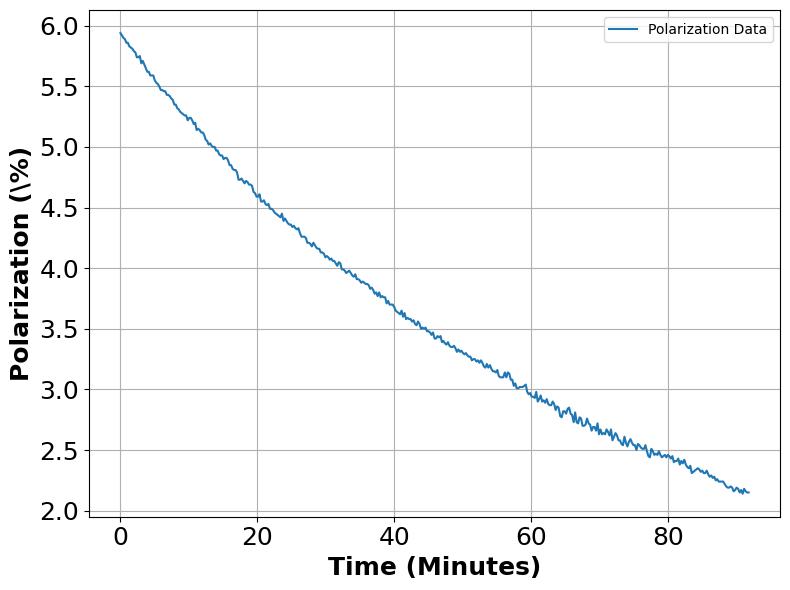

In [2]:
# Call .csv file
file_path = 'Events_Feb_1.csv'

# Load the CSV file
df3 = pd.read_csv(file_path)

# Convert Unix timestamps to CT in minutes for the selected range of rows
ct_timezone = pytz.timezone('America/Chicago')
timestamps_ct = pd.to_datetime(df3.iloc[722:1143, 0], unit='s').dt.tz_localize('UTC').dt.tz_convert(ct_timezone)
minutes_since_first = (timestamps_ct - timestamps_ct.iloc[0]).dt.total_seconds() / 60

# Clean the polarization data
polarization = df3.iloc[722:1143, 1]
clean_indices = ~np.isnan(polarization) & ~np.isinf(polarization)
minutes_since_first = minutes_since_first[clean_indices]
polarization = polarization[clean_indices]

# Plot the cleaned data
plt.figure(figsize=(8, 6))
plt.plot(minutes_since_first, polarization, label='Polarization Data')
plt.xlabel('Time (Minutes)',fontsize=18, fontweight='bold')
plt.ylabel('Polarization (\%)',fontsize=18, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fit_2/polarization_Feb_1_Without_Cuts.png', dpi=2000)
plt.savefig('Fit_2/polarization_Feb_1_Without_Cuts.pdf',format='pdf')

plt.show()

### Applying Cuts

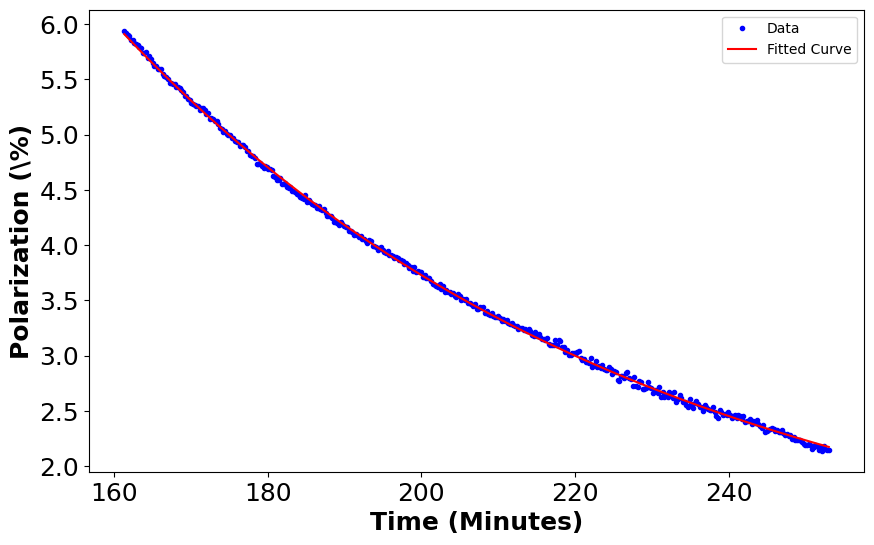

In [3]:
# Load the CSV file
df = pd.read_csv('Events_Feb_1.csv')

# Define the function to fit
def model(t, a, b, c):
    return a * np.exp(-t / b) + c 

# Assuming 't' and 'p' are the column names for time and the parameter to fit, respectively
t_data = df.iloc[722:1143, 2]
p_data = df.iloc[722:1143, 1]

# Adjust these values based on your data
initial_guess = (92, 50, 2)

# Fit the model to the data
params, covariance = curve_fit(model, t_data, p_data, p0=initial_guess, maxfev=10000)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Generate fitted values
fitted_values = model(t_data, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(t_data, p_data, 'b.', label='Data')
plt.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
plt.xlabel('Time (Minutes)',fontsize=18, fontweight='bold')
plt.ylabel('Polarization (\%)',fontsize=18, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=18)


#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
plt.legend()
#plt.title(f'Fitted Curve: p(t) = e^(-t/{b_opt:.4f})*{a_opt:.4f}')
plt.show()


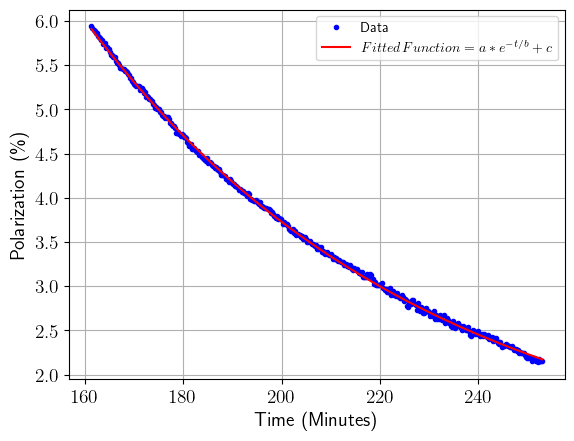

In [4]:
from matplotlib import rcParams

# Set the LaTeX preamble
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Plotting setup
fig, ax = plt.subplots()
ax.plot(t_data, p_data, 'b.', label='Data')
ax.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
#ax.plot(p0, f(p0), 'b-', lw=2.0)
ax.legend([
    r"Data",r" $Fitted \, Function = a * e^{-t/b} + c$"
], loc='upper right', fontsize=10)
# Set the title with a raw string to avoid issues with backslashes
#ax.set_title(r'Piecewise Function')
plt.xlabel('Time (Minutes)',fontsize=14, fontweight='bold')
plt.ylabel('Polarization (\%)',fontsize=14, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

#plt.title(f'Fitted Curve: p(t) = $e^$(-t/{b_opt:.4f})*{a_opt:.4f}')
#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
ax.grid(True)
plt.savefig('Fit_2/fit_2_T1_Extraction.pdf',dpi=2000)
plt.savefig('Fit_2/fit_2_T1_Extraction.png',dpi=2000)
# Display the plot
plt.show()

### Plotted residuals of the fit

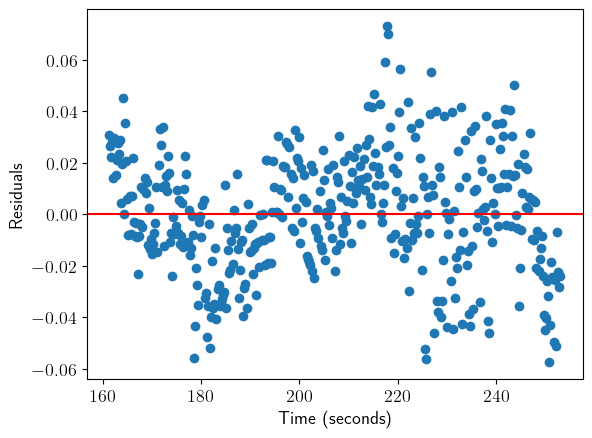

In [5]:
# Set the LaTeX preamble
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Plotting setup
fig, ax = plt.subplots()

# Calculate residuals
residuals = p_data - fitted_values

# Plot residuals
#plt.figure(figsize=(10, 6))
ax.plot(t_data, residuals, 'o')
#plt.title('Residuals of the Fit')
plt.xlabel('Time (seconds)', fontsize=13, fontweight='bold')
plt.ylabel('Residuals', fontsize=13, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('Fit_2/fit_2_residual.pdf',dpi=2000)
plt.savefig('Fit_2/fit_2_residual.png',dpi=2000)
plt.show()

### Calculated R-Squared

In [6]:
# Calculate R-squared
ss_res = np.sum(residuals**2)
ss_tot = np.sum((p_data - np.mean(p_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f'Optimized parameters: a = {a_opt:.4f}, b = {b_opt:.4f}, c = {c_opt:.4f}')
print(f'R-squared: {r_squared:.4f}')
print(f'RMSE: {rmse:.4f}')

Optimized parameters: a = 52.6765, b = 68.9487, c = 0.8323
R-squared: 0.9995
RMSE: 0.0229


In [7]:
# Existing code to fit the model and plot
# ...

# Fit the model to the data
params, covariance = curve_fit(model, t_data, p_data, p0=initial_guess, maxfev=10000)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Calculate the errors in the fitting parameters
errors = np.sqrt(np.diag(covariance))
a_err, b_err, c_err = errors

# Generate fitted values
fitted_values = model(t_data, a_opt, b_opt, c_opt)

# Calculate residuals
residuals = p_data - fitted_values

# Assuming a constant variance of 1 for all data points. Replace 1 with your variance array if you have one.
variance = 1

# Calculate Chi-Square
chi_square = np.sum((residuals**2) / variance)

# Print the optimized parameters and their errors
print(f'Optimized parameters:')
print(f'a = {a_opt:.4f} ± {a_err:.4f}')
print(f'b = {b_opt:.4f} ± {b_err:.4f}')
print(f'c = {c_opt:.4f} ± {c_err:.4f}')

# Print the Chi-Square value
print(f'Chi-Square: {chi_square:.4f}')

# The rest of your plotting and statistics code
# ...


Optimized parameters:
a = 52.6765 ± 0.6350
b = 68.9487 ± 0.4384
c = 0.8323 ± 0.0176
Chi-Square: 0.2207


### He4 pressure

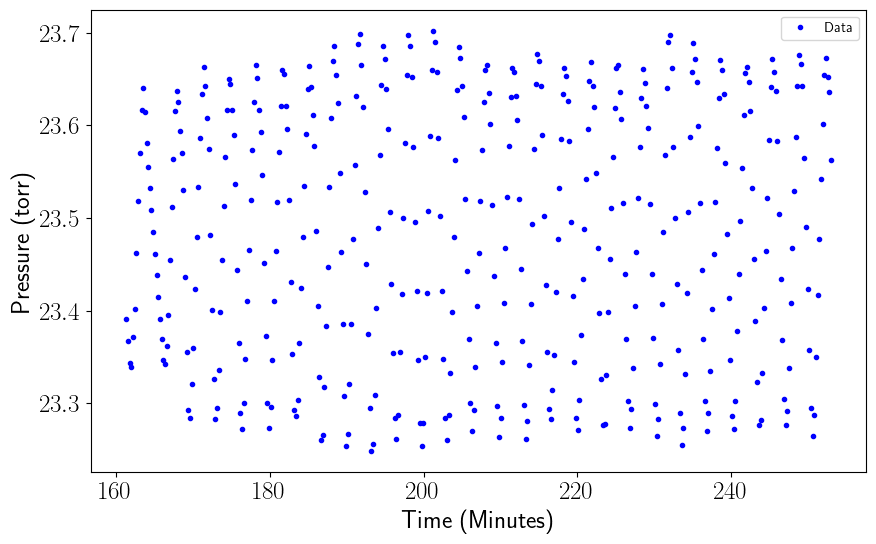

In [8]:
# Load the CSV file
df = pd.read_csv('Events_Feb_1.csv')

# Define the function to fit
def model(t, a, b, c):
    return a * np.exp(-t / b) + c 

# Assuming 't' and 'p' are the column names for time and the parameter to fit, respectively
t_data = df.iloc[722:1143, 2]
pressure_data = df.iloc[722:1143, 3]

# Adjust these values based on your data
initial_guess = (100, 68, 10)

# Fit the model to the data
params, covariance = curve_fit(model, t_data, p_data, p0=initial_guess, maxfev=10000)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Generate fitted values
fitted_values = model(t_data, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(t_data, pressure_data, 'b.', label='Data')
#plt.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
plt.xlabel('Time (Minutes)',fontsize=18, fontweight='bold')
plt.ylabel('Pressure (torr)',fontsize=18, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=18)


#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
plt.legend()
#plt.title(f'Fitted Curve: p(t) = e^(-t/{b_opt:.4f})*{a_opt:.4f}')
plt.show()


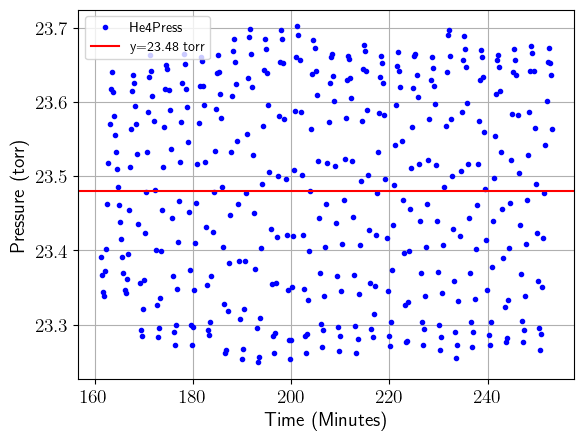

In [9]:
from matplotlib import rcParams

# Set the LaTeX preamble
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Plotting setup
fig, ax = plt.subplots()
ax.plot(t_data, pressure_data, 'b.', label='He4Press')
# Value at which the horizontal line will be plotted
y_value = 23.48
ax.axhline(y=y_value, color='r', linestyle='-')
#ax.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
#ax.plot(p0, f(p0), 'b-', lw=2.0)
#ax.legend([
#    r"Data",r" $Fitted \, Function = a * e^{-t/b} + c$"
#], loc='upper right', fontsize=10)
# Set the title with a raw string to avoid issues with backslashes
#ax.set_title(r'Piecewise Function')
ax.legend(['He4Press','y=23.48 torr'])
plt.xlabel('Time (Minutes)',fontsize=14, fontweight='bold')
plt.ylabel('Pressure (torr)',fontsize=14, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

#plt.title(f'Fitted Curve: p(t) = $e^$(-t/{b_opt:.4f})*{a_opt:.4f}')
#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
ax.grid(True)
plt.savefig('Fit_2/fit_2_He4Pressure.pdf',dpi=2000)
plt.savefig('Fit_2/fit_2_He4Pressure.png',dpi=2000)
# Display the plot
plt.show()

### He4 Temperature

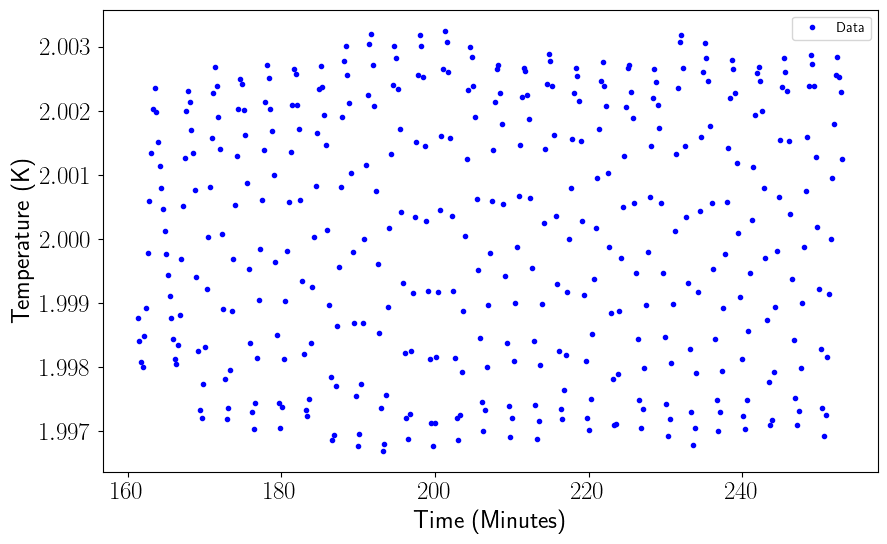

In [10]:
# Load the CSV file
df = pd.read_csv('Events_Feb_1.csv')

# Define the function to fit
def model(t, a, b, c):
    return a * np.exp(-t / b) + c 

# Assuming 't' and 'p' are the column names for time and the parameter to fit, respectively
t_data = df.iloc[722:1143, 2]
temp_data = df.iloc[722:1143, 4]

# Adjust these values based on your data
initial_guess = (100, 68, 10)

# Fit the model to the data
params, covariance = curve_fit(model, t_data, p_data, p0=initial_guess, maxfev=10000)

# Extract the optimized parameters
a_opt, b_opt, c_opt = params

# Generate fitted values
fitted_values = model(t_data, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(t_data, temp_data, 'b.', label='Data')
#plt.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
plt.xlabel('Time (Minutes)',fontsize=18, fontweight='bold')
plt.ylabel('Temperature (K)',fontsize=18, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=18)


#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
plt.legend()
#plt.title(f'Fitted Curve: p(t) = e^(-t/{b_opt:.4f})*{a_opt:.4f}')
plt.show()


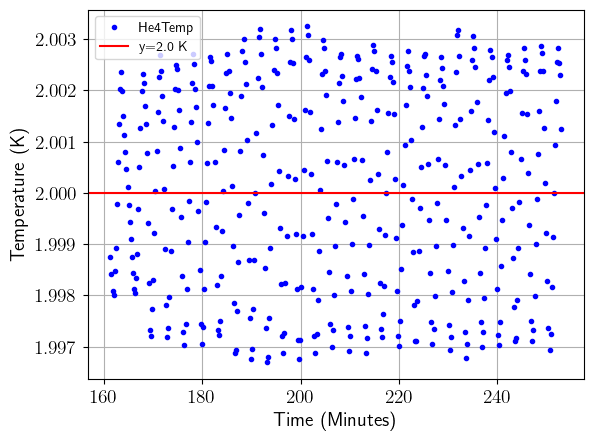

In [11]:
from matplotlib import rcParams

# Set the LaTeX preamble
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Plotting setup
fig, ax = plt.subplots()
ax.plot(t_data, temp_data, 'b.', label='He4Temp')
# Value at which the horizontal line will be plotted
y_value = 2.0
ax.axhline(y=y_value, color='r', linestyle='-')
#ax.plot(t_data, fitted_values, 'r-', label='Fitted Curve')
#ax.plot(p0, f(p0), 'b-', lw=2.0)
#ax.legend([
#    r"Data",r" $Fitted \, Function = a * e^{-t/b} + c$"
#], loc='upper right', fontsize=10)
# Set the title with a raw string to avoid issues with backslashes
#ax.set_title(r'Piecewise Function')
ax.legend(['He4Temp','y=2.0 K'])
plt.xlabel('Time (Minutes)',fontsize=14, fontweight='bold')
plt.ylabel('Temperature (K)',fontsize=14, fontweight='bold')
#plt.title('Polarization vs. Time (Irradiated CH2)')
# Increase the size of the axis tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

#plt.title(f'Fitted Curve: p(t) = $e^$(-t/{b_opt:.4f})*{a_opt:.4f}')
#plt.xlabel('Time (seconds)')
#plt.ylabel('p(t)')
ax.grid(True)
plt.savefig('Fit_2/fit_2_He4Temperature.pdf',dpi=2000)
plt.savefig('Fit_2/fit_2_He4Temperature.png',dpi=2000)
# Display the plot
plt.show()